In [88]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

#assumed as spot rates
data1=pd.read_csv("^NSEI.csv",index_col='Date')
data=data1['Close']

# ret
returns = data.pct_change()
returns=returns.dropna()

In [89]:
returns

Date
2007-10-01    0.175112
2007-11-01   -0.023370
2007-12-01    0.065221
2008-01-01   -0.163091
2008-02-01    0.016750
                ...   
2019-08-01   -0.008522
2019-09-01    0.040932
2019-10-01    0.035122
2019-11-01    0.015037
2019-12-01   -0.003123
Name: Close, Length: 147, dtype: float64

In [90]:

#stats
print("mean = {}".format(np.mean(returns)))
print ("std dev = {}".format(np.std(returns)))
print ("min = {}".format(np.min(returns)))
print ("max = {}".format(np.max(returns)))
print ("skewness = {}".format(returns.skew()))
print ("excess kurtosis = {}".format(returns.kurtosis()))

mean = 0.007942881489743916
std dev = 0.06280927441559005
min = -0.26410279147736315
max = 0.28066041760887783
skewness = -0.06730995609743282
excess kurtosis = 4.179649601594983


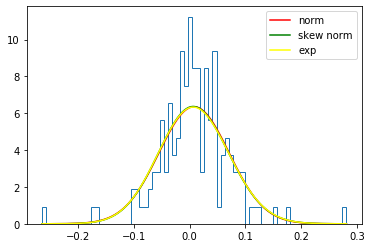

In [99]:
#model using cont dist
ps = stats.norm.fit(returns)
y1= stats.norm.pdf(xs,*ps)
ps = stats.skewnorm.fit(returns)
y2= stats.skewnorm.pdf(xs,*ps)
# just for experiment
ps = stats.gamma.fit(returns)
y3= stats.gamma.pdf(xs,*ps)

plt.plot(xs,y1,color='red',label="norm")
plt.plot(xs,y2,color='green',label="skew norm")
plt.plot(xs,y3,color='yellow',label="experimental")
plt.hist(returns,bins=75,density='True', histtype='step')
plt.legend()
plt.show()